In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [158]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
df.shape

(891, 12)

### We can see that Cabin column is missing many values, while Age and Embarked columns not missing alot

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So it is better if we dropped the Cabin column

In [161]:
df.drop(['Cabin'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Using this Box Plot on Age column we can easily detect that there are outliers

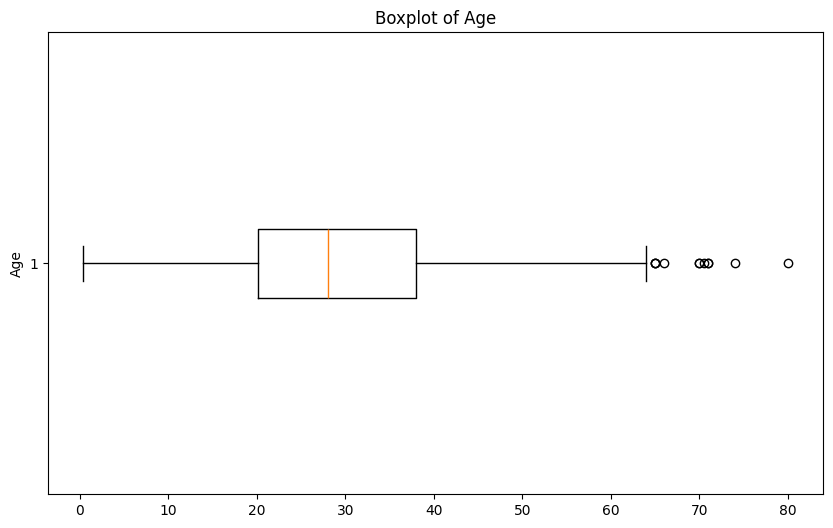

In [162]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

### I replaced all the nan values with the median, as the mean will be shifted dueto the presence of outliers

In [163]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/var/folders/km/f2sjhq8n5_5_gk1qvnf3h7ww0000gn/T/ipykernel_6695/3787586473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


### Here i wanted to deal with the nan values in the Embarked column. Since it is only missing 2 values, removing these 2 data points won't affect in the model training so i removed them from the dataframe

In [164]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Now we can see alot of columns that has many unique values

In [165]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

### I decided to drop them as they don't add any value to our prediction

In [166]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## The next 2 plots i used to detect if there is a trend or a pattern that can be detected

### In the bar plot between Sex and Survivale rate we can ses that there is a correlation. But is it high enough to use Sex column in a linear model to predict if they survive?

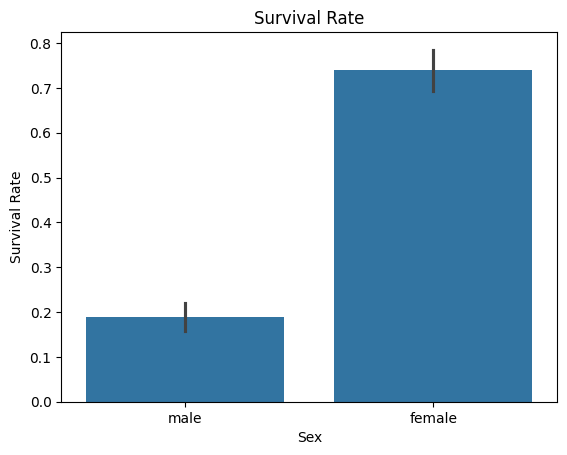

In [167]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

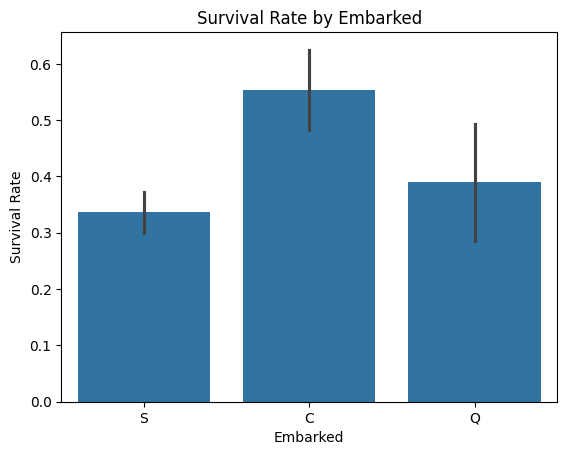

In [168]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

## Encoded the Sex and Embarked columns, not neede if we are using a tree based classifier.

In [169]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

### In this correlation matrix we can see that there is no very high corelatioin between any 2 features which indicates that we have no redondunt data, But as we figuered earlier in the bar plot between sex and survived column that there is a correlation(-0.54) which is a good correlation but not good enouph to use a linear model

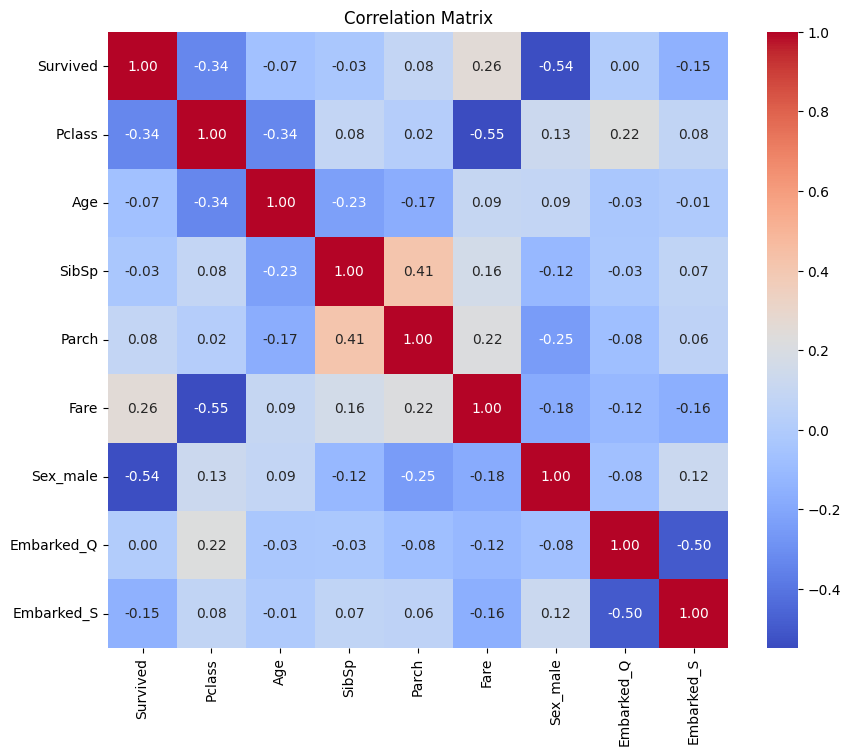

In [170]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show() 

In [171]:
X_test, X_train, y_test, y_train = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

## The next steps are creating grid search cross validation for Decision Tree, Random Forest and SVM algorithms that is used for parameter tuning

### Decision Tree model

In [172]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_dt_search.fit(X_train, y_train)

best_params = grid_dt_search.best_params_
print("Best parameters found: ", best_params)

best_score = grid_dt_search.best_score_
print("Best cross-validation score: ", best_score)

best_estimator = grid_dt_search.best_estimator_
print("Best estimator: ", best_estimator)


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score:  0.7868253968253969
Best estimator:  DecisionTreeClassifier(min_samples_leaf=4, random_state=42)


Test set accuracy:  0.7679324894514767
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       440
           1       0.79      0.53      0.63       271

    accuracy                           0.77       711
   macro avg       0.78      0.72      0.73       711
weighted avg       0.77      0.77      0.76       711



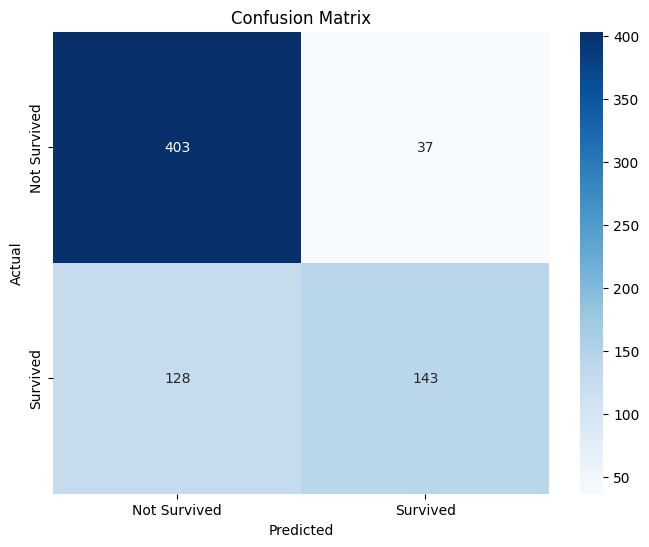

In [173]:
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

print("Classification report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Random forest model

In [174]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_rf_search.fit(X_train, y_train)

best_params_rf = grid_rf_search.best_params_
print("Best parameters found for Random Forest: ", best_params_rf)

best_score_rf = grid_rf_search.best_score_
print("Best cross-validation score for Random Forest: ", best_score_rf)

best_estimator_rf = grid_rf_search.best_estimator_
print("Best estimator for Random Forest: ", best_estimator_rf)

Best parameters found for Random Forest:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest:  0.7868253968253968
Best estimator for Random Forest:  RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       n_estimators=50, random_state=42)


Test set accuracy for Random Forest:  0.8171589310829818
Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       440
           1       0.85      0.63      0.72       271

    accuracy                           0.82       711
   macro avg       0.83      0.78      0.79       711
weighted avg       0.82      0.82      0.81       711



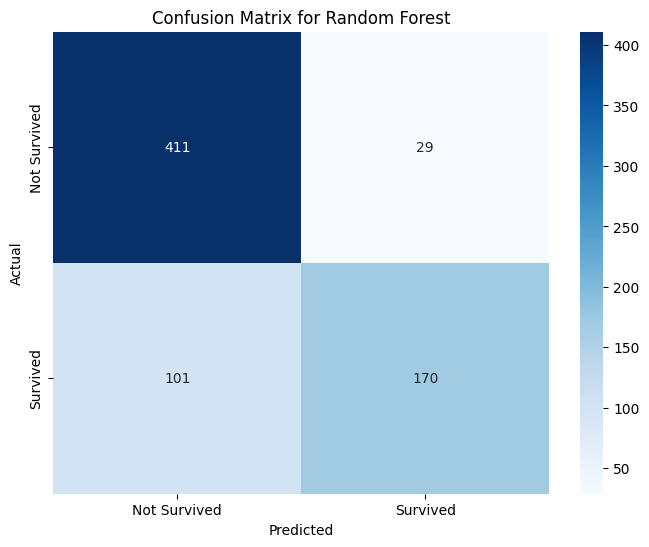

In [175]:
y_pred_rf = best_estimator_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy for Random Forest: ", accuracy_rf)

print("Classification report for Random Forest:\n", classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVM model

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm_search = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1)
grid_svm_search.fit(X_train_scaled, y_train)

best_params_svm = grid_svm_search.best_params_
print("Best parameters found for SVM: ", best_params_svm)

best_score_svm = grid_svm_search.best_score_
print("Best cross-validation score for SVM: ", best_score_svm)

best_estimator_svm = grid_svm_search.best_estimator_
print("Best estimator for SVM: ", best_estimator_svm)

Best parameters found for SVM:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM:  0.7979365079365079
Best estimator for SVM:  SVC(C=0.1, kernel='linear', random_state=42)


Test set accuracy for SVM:  0.7834036568213784
Classification report for SVM:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       440
           1       0.74      0.66      0.70       271

    accuracy                           0.78       711
   macro avg       0.77      0.76      0.76       711
weighted avg       0.78      0.78      0.78       711



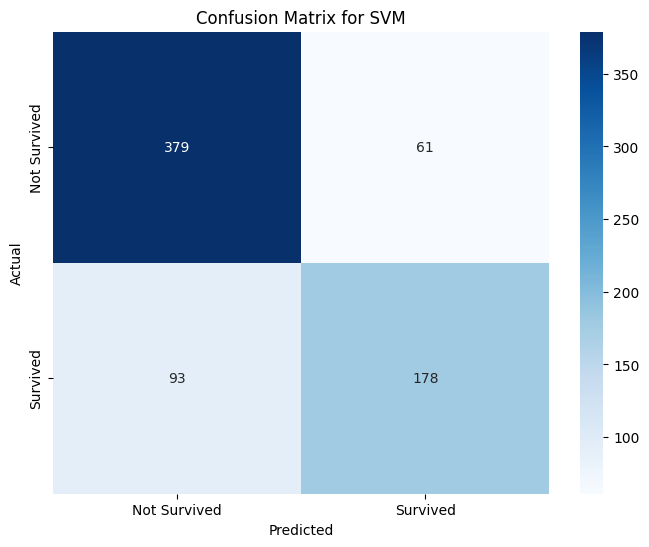

In [178]:
y_pred_svm = best_estimator_svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Test set accuracy for SVM: ", accuracy_svm)

print("Classification report for SVM:\n", classification_report(y_test, y_pred_svm))

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Next i wanted to experiment with the concepts of ensemble and stacking models

### Ensemble model

In [179]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('dt', best_estimator),
        ('rf', best_estimator_rf),
        ('svm', best_estimator_svm)
    ],
    voting='hard'  # use 'soft' if models have predict_proba
)

voting_clf.fit(X_train, y_train)

,estimators,"[('dt', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4


Test set accuracy for Voting Classifier:  0.8030942334739803
Classification report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       440
           1       0.81      0.63      0.71       271

    accuracy                           0.80       711
   macro avg       0.81      0.77      0.78       711
weighted avg       0.80      0.80      0.80       711



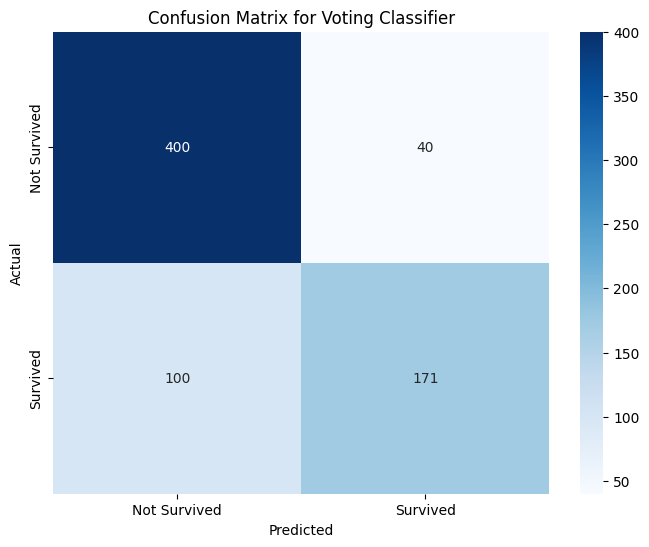

In [180]:
y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Test set accuracy for Voting Classifier: ", accuracy_voting)

print("Classification report for Voting Classifier:\n", classification_report(y_test, y_pred_voting))

conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Stacking model

In [181]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_clf = StackingClassifier(
    estimators=[
        ('svm', best_estimator_svm),
        ('rf', best_estimator_rf),
        ('dt', best_estimator)
    ],
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train, y_train)

,estimators,"[('svm', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'


Test set accuracy for Stacking Classifier:  0.7819971870604782
Classification report for Stacking Classifier:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       440
           1       0.74      0.66      0.70       271

    accuracy                           0.78       711
   macro avg       0.77      0.76      0.76       711
weighted avg       0.78      0.78      0.78       711



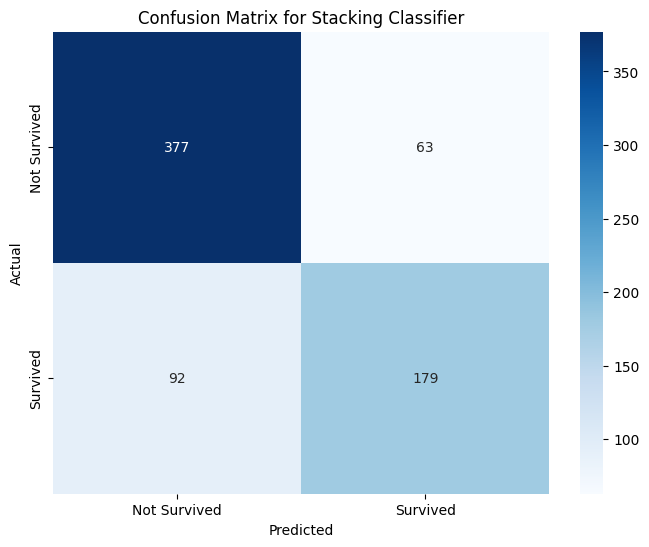

In [182]:
y_pred_stacking = stacking_clf.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Test set accuracy for Stacking Classifier: ", accuracy_stacking)

print("Classification report for Stacking Classifier:\n", classification_report(y_test, y_pred_stacking))

conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()